In [1]:
# Importing the dataset from keras
import keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


<Figure size 432x288 with 0 Axes>

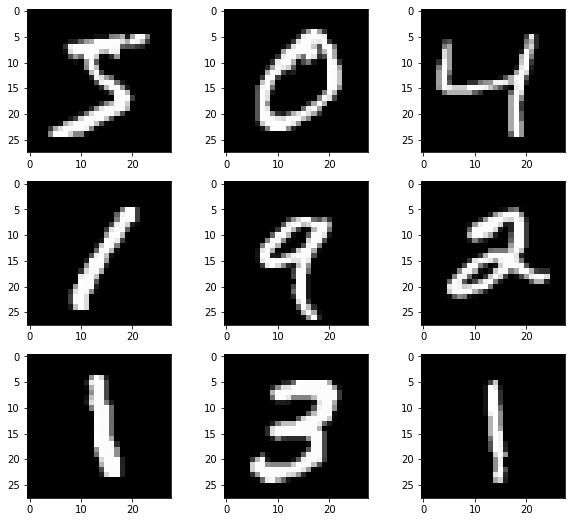

In [4]:
import matplotlib.pyplot as plt
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [7]:
# Data Normalization
# Conversion to float
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
x_train = x_train.reshape(len(x_train),-1)
y_train = y_train

In [17]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(x_train)


C:\Users\badda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=10)

In [18]:
kmeans.labels_

array([9, 4, 0, ..., 2, 2, 3])

In [19]:
def retrieve_info(cluster_labels,y_train):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """
  # Initializing
    reference_labels = {}
  # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
      index = np.where(cluster_labels == i,1,0)
      num = np.bincount(y_train[index==1]).argmax()
      reference_labels[i] = num
    return reference_labels


In [20]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]

In [21]:
print(reference_labels)

{0: 4, 1: 1, 2: 5, 3: 2, 4: 0, 5: 3, 6: 0, 7: 7, 8: 6, 9: 8}


In [22]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype('int'))
print(y_train[:20])

[8 0 4 1 7 2 1 8 1 7 3 1 3 6 1 7 2 2 5 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [23]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5688
